Before you begin, you will need to install the following packages in python, using pip3. 

In [17]:
%matplotlib inline

import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Set a random seed to allow for reproducible results with same configuration. 

In [2]:
np.random.seed(42)

Since we are using supervised learning for this classification task, we will use pandas to load training data from a csv into an input matrix X and a known output vector y. The input matrix is converted into a numpy array to allow for normalization of values.

In [3]:
train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
y_train, X_train = train.iloc[:, 0], np.array(train.iloc[:, 1:])

print('X_train shape')
display(X_train.shape)
print('y_train shape')
display(y_train.shape)
print('X_train sample')
X_train[3:6, 0:20]

X_train shape


(60000, 784)

y_train shape


(60000,)

X_train sample


array([[  0,   0,   0,   1,   2,   0,   0,   0,   0,   0, 114, 183, 112,
         55,  23,  72, 102, 165, 160,  28],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46,
          0,  21,  68,   0,   0,   0,   0],
       [  0,   0,   0,   5,   4,   5,   5,   3,   5,   6,   2,   0,   0,
          0,   0,   0,   0,   0,   2,   3]])

We have an input matrix of 60000 samples with 784 pixel values each (28 x 28 flattened into a single row). The y_train vector has the corresponding category value for each sample, which ranges from 0 = T-shirt/top, 1 = Trouser, 2 = Pullover, 3 = Dress,
# 4 = Coat, 5 = Sandal, 6 = Shirt, 7 = Sneaker, 8 = Bag, 9 = Ankle boot.

The fashion mnist data is already broken up into train and test (validation) datasets, so next, we need to load the validation data just as we did with the train data. The only difference in shape here is that the validation dataset has 10000 samples instead of 60000.

In [4]:
validation = pd.read_csv('fashionmnist/fashion-mnist_test.csv')
y_valid, X_valid = validation.iloc[:, 0], np.array(validation.iloc[:, 1:])

Once the data is loaded, for visulaization and calculation, it is useful to normalize our values to between 0 and 1 by taking the average pixel value for each pixel by dividing by the highest possible value, which is 255. In order to do this kind of calculation on each item in the matrix, we need to convert the values in the matrix to a datatype that allows mathematical calculation, such as float32. We do this for both train and validation inputs. 

In [5]:
X_train = X_train.astype('float32')
X_train /= 255
X_valid = X_valid.astype('float32')
X_valid /= 255

X_train[3:6, 0:20]

array([[ 0.        ,  0.        ,  0.        ,  0.00392157,  0.00784314,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.44705883,  0.71764708,  0.43921569,  0.21568628,  0.09019608,
         0.28235295,  0.40000001,  0.64705884,  0.627451  ,  0.10980392],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.18039216,  0.        ,  0.08235294,
         0.26666668,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.01960784,  0.01568628,
         0.01960784,  0.01960784,  0.01176471,  0.01960784,  0.02352941,
         0.00784314,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00784314,  0.01176471]], dtype=float32)

Now that we have our inputs in shape, we need to get our outputs ready. So, we will use numpy's to_categorical method to one-hot encode our outputs in y, knowing that we have 10 possible categories of clothing as listed above.

In [8]:
number_output_classes = 10

y_train = to_categorical(y_train, num_classes=number_output_classes)
y_valid = to_categorical(y_valid, num_classes=number_output_classes)

y_train

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [10]:
model = Sequential()

# layer 1: 16 neurons
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

model.add(BatchNormalization())
model.add(Dropout(0.2))

# add depth
model.add(Dense(40, activation='sigmoid'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                5160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                410       
Total params: 106,562
Trainable params: 106,306
Non-trainable params: 256
_________________________________________________________________


A fuller description of the model here...

Now we can compile and train (fit) the model.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Describe each parameter here and link to other possible options.

Now we can train (fit) our model.

In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0,
          validation_data=(X_valid, y_valid))

Describe each parameter and maybe a little about tuning...

Now let's plot the results.

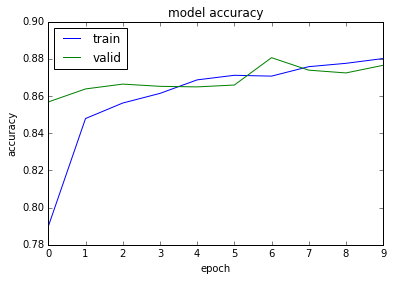

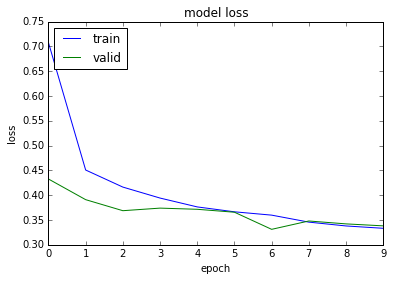

In [18]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()